# 🌍 Customer Purchase Regional Analysis  

### 🔍 This notebook focuses on analyzing customer and regional sales patterns to optimize business strategies.  

## 🔹 We will explore:  
####✅ # Identifying Top-Performing Regions and High-Value Customers 🌍  
####✅ # Analyzing Regional Sales Trends and Customer Behavior 📊  
####✅ # Helping Businesses Target High-Revenue Areas and Improve Low-Performing Regions

## 📂 Load the Dataset  
* We begin by loading the sales dataset to explore its structure and contents.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px # Optional for interactive visualizations

df=pd.read_csv("drive/MyDrive/Colab Notebooks/Data.csv")
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of To

# Top-Performing Regions and High-Value Customers 🌍
##Analysis Approach:
####✅Top-performing regions → Group by COUNTRY or CITY, sum up SALES, and rank.

####✅High-value customers → Group by CUSTOMERNAME, sum up SALES, and identify the top buyers.

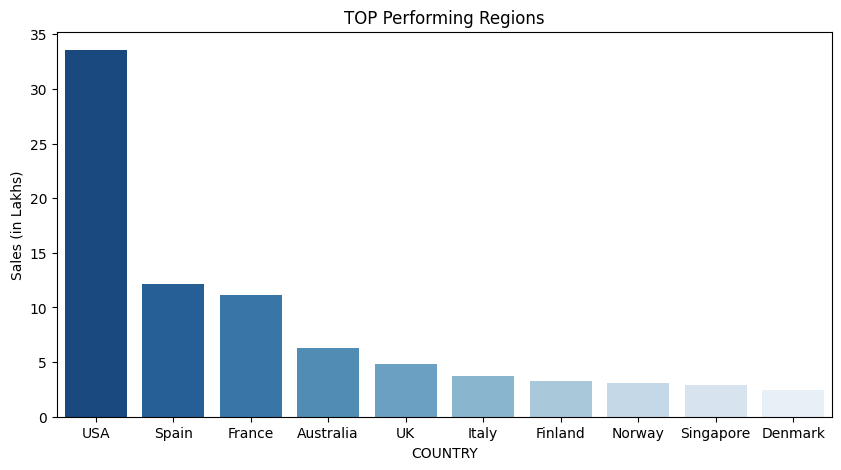

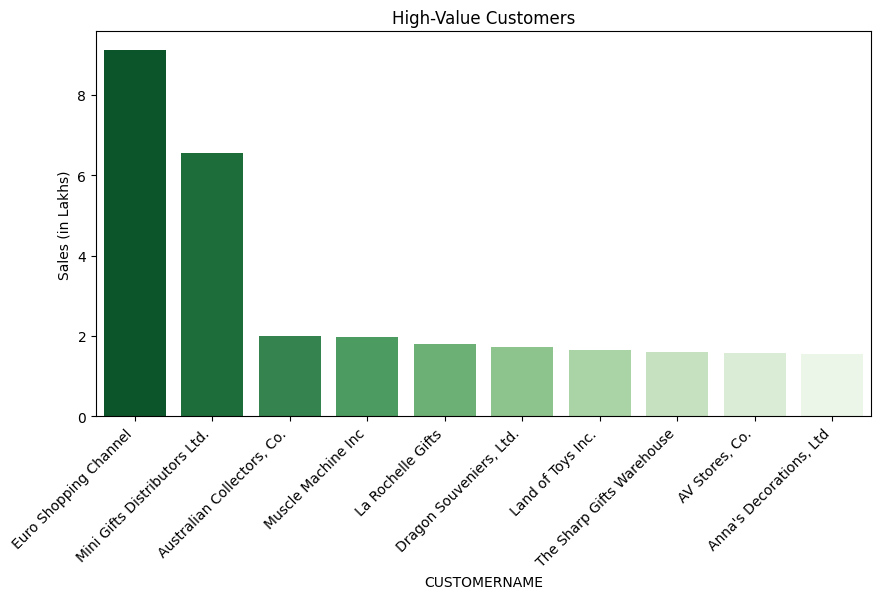

In [3]:
# Top-performing regions by total sales

Region_Sales=df.groupby("COUNTRY")["SALES"].sum().reset_index()
Region_Sales=Region_Sales.sort_values(by="SALES",ascending=False).head(10)
Region_Sales['SALES'] = Region_Sales['SALES'] / 1e5

# Top 10 customers by sales

Top_Customers=df.groupby("CUSTOMERNAME")["SALES"].sum().reset_index()
Top_Customers=Top_Customers.sort_values(by="SALES",ascending=False).head(10)
Top_Customers['SALES'] = Top_Customers['SALES'] / 1e5

# Visualisation

plt.figure(figsize=(10,5))
sns.barplot(data=Region_Sales,x="COUNTRY", y="SALES",hue="COUNTRY",palette="Blues_r")
plt.title("TOP Performing Regions")
plt.ylabel("Sales (in Lakhs)")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=Top_Customers,x="CUSTOMERNAME", y="SALES",hue="CUSTOMERNAME",palette="Greens_r")
plt.title("High-Value Customers")
plt.ylabel("Sales (in Lakhs)")

# Rotating the x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

plt.show()

#Analyzing Regional Sales Trends and Customer Behavior 📊
##Analysis Approach:
####✅Regional Sales Trends → Check monthly/yearly sales trends by region (COUNTRY + ORDERDATE).

####✅Customer Behavior Patterns → Analyze DAYS_SINCE_LASTORDER to see how frequently customers purchase.

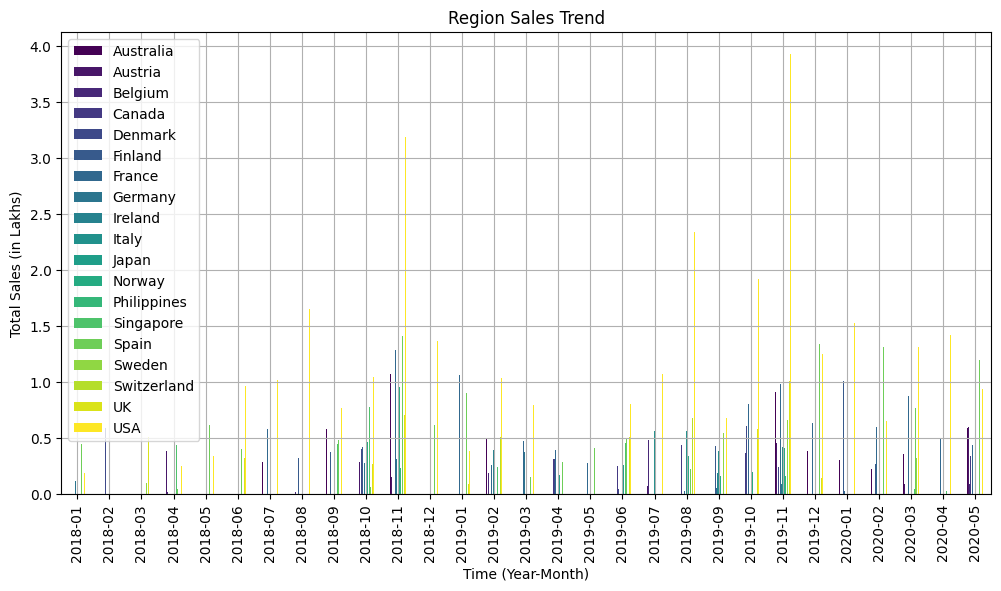

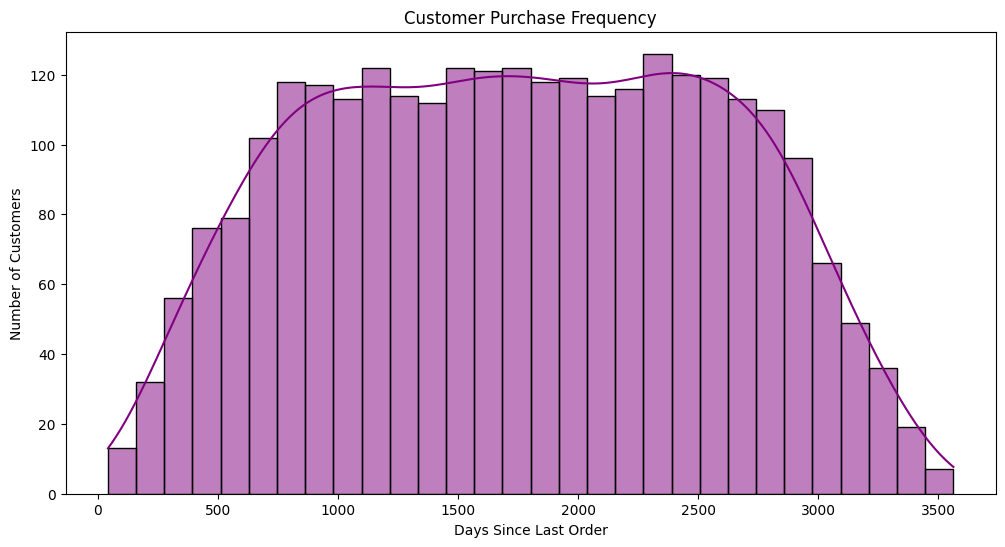

In [5]:
# Convert ORDERDATE to datetime format

df["ORDERDATE"]=pd.to_datetime(df["ORDERDATE"])

# Monthly Sales by Region

df["YearMonth"]=df["ORDERDATE"].dt.to_period("M")
Region_Sales=df.groupby(["YearMonth","COUNTRY"])["SALES"].sum().unstack()/1e5

# Plot Regional Sales Trends

Region_Sales.plot(kind="bar",figsize=(12,6),colormap="viridis")
plt.title("Region Sales Trend")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Total Sales (in Lakhs)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

# Customer Behavior: Days Since Last Order

plt.figure(figsize=(12,6))
sns.histplot(df["DAYS_SINCE_LASTORDER"],bins=30, kde=True, color='purple')
plt.title('Customer Purchase Frequency')
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')
plt.show()

#Target High-Revenue Areas and Improve Low-Performing Regions
##Analysis Approach:
####✅Identify top revenue-generating regions and low-performing regions.

####✅Compare average deal size (DEALSIZE) across regions.

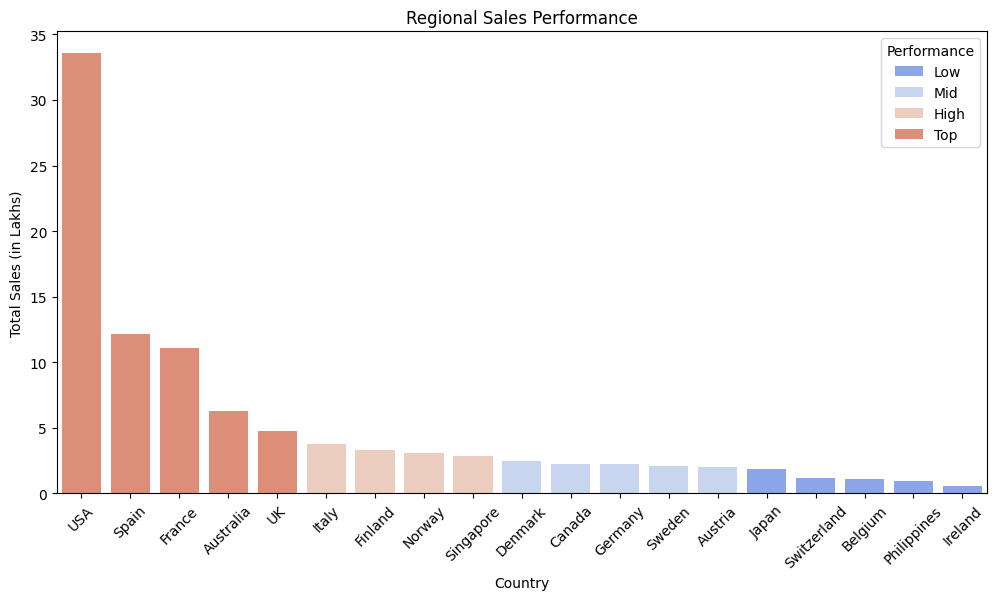

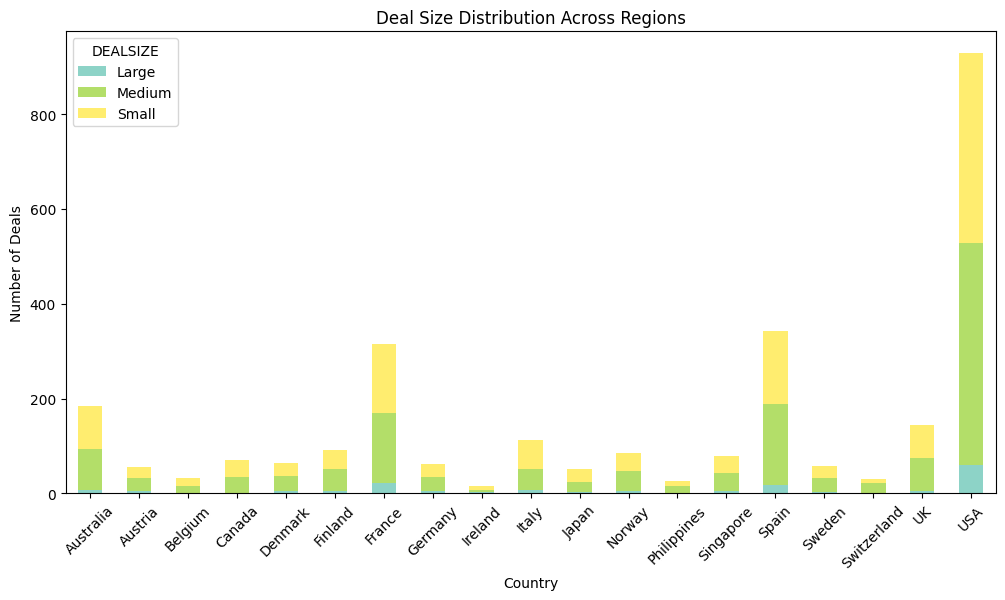

In [ ]:
# Identify High vs Low Performing Regions
region_performance = df.groupby('COUNTRY')['SALES'].sum().reset_index()
region_performance['Performance'] = pd.qcut(region_performance['SALES'], q=4, labels=['Low', 'Mid', 'High', 'Top'])

# Convert Sales to Lakhs
region_performance['SALES'] = region_performance['SALES'] / 1e5

# 🔹 Plot: High vs Low Performing Regions (with sales in lakhs)
plt.figure(figsize=(12,6))
sns.barplot(x='COUNTRY', y='SALES',data=region_performance.sort_values(by='SALES', ascending=False),hue='Performance', palette='coolwarm')
plt.title('Regional Sales Performance')
plt.xlabel('Country')
plt.ylabel('Total Sales (in Lakhs)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Average Deal Size Across Regions
df_dealsize = df.groupby('COUNTRY')['DEALSIZE'].value_counts().unstack().fillna(0)

# 🔹 Plot: Deal Size Distribution
df_dealsize.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('Deal Size Distribution Across Regions')
plt.xlabel('Country')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45)

plt.show()